## **Importing necessary libraries and Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
devs = tf.config.list_physical_devices('GPU')
for dev in devs:
    tf.config.experimental.set_memory_growth(dev, True)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Load the dataset
file_path = '/content/archive.zip'  # Change to your dataset file path
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

## **Basic Exploration**

In [ ]:
# Basic Data Exploration
print("### Data Information ###")
print(data.info())
print("\n### Data Description ###")
print(data.describe())

# Check for missing values
print("\n### Missing Values ###")
print(data.isnull().sum())

# Handling Missing Values (if any)
data = data.dropna()  # Dropping rows with missing values

# Display first few rows
print("\n### Sample Data ###")
print(data.head())


### Data Information ###
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2010-06-29 to 2024-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3592 non-null   float64
 1   High       3592 non-null   float64
 2   Low        3592 non-null   float64
 3   Close      3592 non-null   float64
 4   Adj Close  3592 non-null   float64
 5   Volume     3592 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB
None

### Data Description ###
              Open         High          Low        Close    Adj Close  \
count  3592.000000  3592.000000  3592.000000  3592.000000  3592.000000   
mean     77.446837    79.142413    75.643622    77.431415    77.431415   
std     103.266198   105.554437   100.778725   103.198204   103.198204   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.801500    12.068833    11.534000    11.858333    11.858333   
50% 

## **Time Series Decomposition**

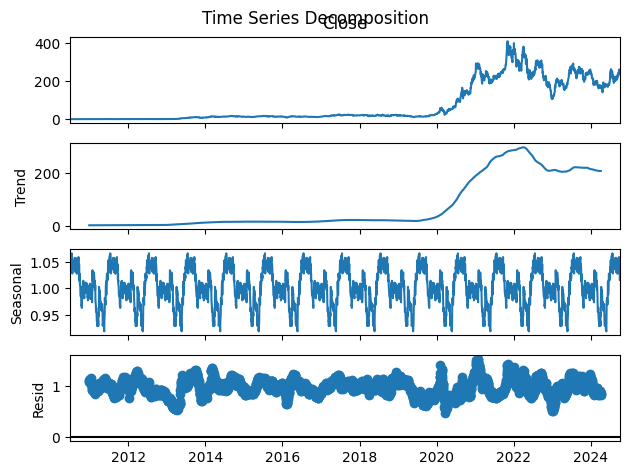

In [ ]:
# Time Series Decomposition
decompose_result = seasonal_decompose(data['Close'].dropna(), model='multiplicative', period=252)
decompose_result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def regression_metrics(y_test, y_pred):

    # calculate errors

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    eps = 1e-10 # a small value to avoid division by zero

    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / (y_test + eps)))))

    #rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))

    mae = mean_absolute_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    r2_score = sklearn.metrics.r2_score(y_test, y_pred)

    # report error

    print(f'Mean Squared Error: {mse}')

    print(f'Root Mean Square Error: {rmse}')

    print(f'Root Mean Square Percentage Error: {rmspe}')

    print(f'Mean Absolute Error: {mae}')

    print(f'Mean Absolute Percentage Error: {mape}')

    print(f'R2 score: {r2_score}')



# Activation functions for comparing
* ReLU
* Tanh
* GELU
* Proposed 1

# Custom Activation Functions

In [ ]:
def custom_act(x):
    return tf.where(x>=0, x, tf.tanh(x)+tf.atan(x))

#model 3 with custom fn second time

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 43.3055 - mae: 43.0233 - val_loss: 6.7815 - val_mae: 6.4583
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.6268 - mae: 5.3005 - val_loss: 5.6190 - val_mae: 5.2905
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5730 - mae: 5.2444 - val_loss: 2.7653 - val_mae: 2.4401
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9598 - mae: 2.6414 - val_loss: 5.7540 - val_mae: 5.4522
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9653 - mae: 3.6650 - val_loss: 2.5024 - val_mae: 2.2124
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2860 - mae: 2.9981 - val_loss: 3.5746 - val_mae: 3.2964
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0083 - mae: 2.7325 - val_loss: 2.2153 - val_mae: 1.9458
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7258 - mae: 2.4593 - val_loss: 3.7602 - val_mae: 3.5004
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss:

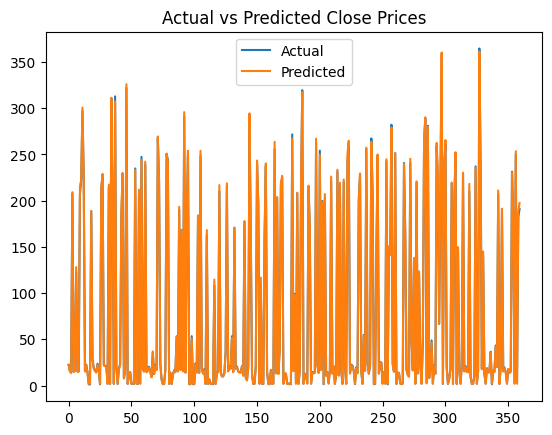

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, LSTM, Bidirectional, Dense
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define custom activation function
def custom_act(x):
    return tf.where(x >= 0, x, tf.tanh(x) + tf.atan(x))

# Load the new dataset
file_path = '/content/archive.zip'  # Update with your dataset path
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(data.head())

# Extracting relevant columns for features (excluding 'Date')
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
target_column = 'Close'  # We want to predict the 'Close' price

# Extract features (X) and target (y)
X = data[feature_columns].values
y = data[target_column].values

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Reshape data for LSTM (3D array: samples, timesteps, features)
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], X_train_norm.shape[1], 1)  # (samples, timesteps, features)
X_val_norm = X_val_norm.reshape(X_val_norm.shape[0], X_val_norm.shape[1], 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1], 1)

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation(custom_act)(cnn_conv1)

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='relu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation=custom_act, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense2 = Dense(8, activation=custom_act, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()


#model 3 with tanh

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 74.3505 - mae: 74.1102 - val_loss: 71.5486 - val_mae: 71.4107
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 73.2711 - mae: 73.1424 - val_loss: 69.5326 - val_mae: 69.3856
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 71.0264 - mae: 70.8874 - val_loss: 68.1892 - val_mae: 68.0707
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 69.4794 - mae: 69.3655 - val_loss: 67.8304 - val_mae: 67.7287
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 68.3779 - mae: 68.2797 - val_loss: 67.7702 - val_mae: 67.6819
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 70.3484 - mae: 70.2487 - val_loss: 67.9194 - val_mae: 67.6801
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 70.4715 - mae: 70.2425 - val_loss: 67.8617 - val_mae: 67.6805
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 70.1637 - mae: 69.9937 - val_loss: 67.8119 - val_mae: 67.6689
Epoch 9/100
45/45 ━━━━━━

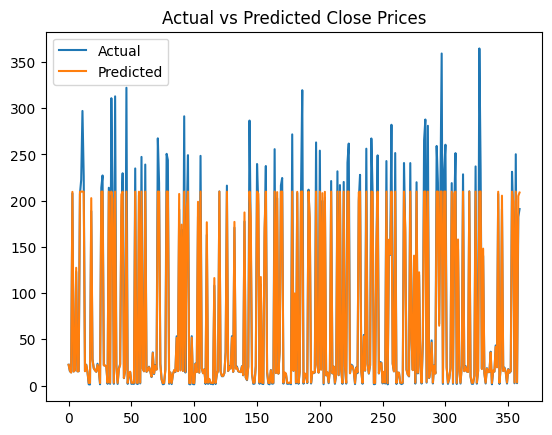

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, LSTM, Bidirectional, Dense
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the new dataset
file_path = '/content/archive.zip'  # Update with your dataset path
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(data.head())

# Extracting relevant columns for features (excluding 'Date')
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
target_column = 'Close'  # We want to predict the 'Close' price

# Extract features (X) and target (y)
X = data[feature_columns].values
y = data[target_column].values

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Reshape data for LSTM (3D array: samples, timesteps, features)
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], X_train_norm.shape[1], 1)  # (samples, timesteps, features)
X_val_norm = X_val_norm.reshape(X_val_norm.shape[0], X_val_norm.shape[1], 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1], 1)

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('tanh')(cnn_conv1)

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='tanh', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()


#model 3 with relu

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 78.8884 - mae: 78.7521 - val_loss: 75.3268 - val_mae: 75.2968
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.2770 - mae: 48.2130 - val_loss: 7.2982 - val_mae: 7.1712
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6596 - mae: 7.5318 - val_loss: 5.8137 - val_mae: 5.6858
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7679 - mae: 4.6381 - val_loss: 3.5538 - val_mae: 3.4088
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6085 - mae: 3.4564 - val_loss: 4.4044 - val_mae: 4.2460
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2196 - mae: 4.0617 - val_loss: 2.5893 - val_mae: 2.4289
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6300 - mae: 2.4698 - val_loss: 3.8952 - val_mae: 3.7341
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6738 - mae: 2.5117 - val_loss: 2.7198 - val_mae: 2.5562
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - los

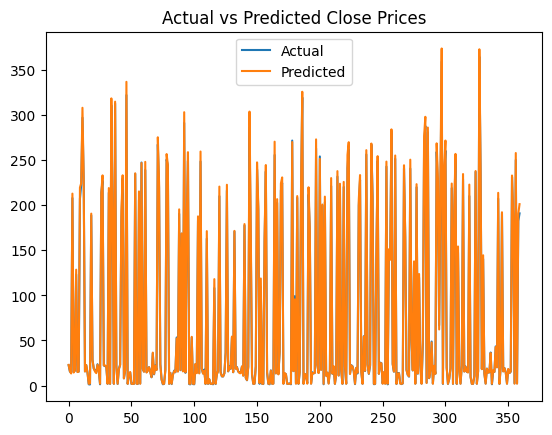

In [ ]:
from tensorflow.keras.layers import ReLU

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('relu')(cnn_conv1)  # ReLU activation

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='relu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)  # ReLU activation
dense2 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)  # ReLU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()


#model 3 with tanh

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 75.5194 - mae: 75.2688 - val_loss: 71.2207 - val_mae: 70.9763
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 70.2899 - mae: 70.0705 - val_loss: 69.1746 - val_mae: 69.0155
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 71.2798 - mae: 71.1321 - val_loss: 68.0401 - val_mae: 67.9177
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.7862 - mae: 67.6694 - val_loss: 67.8078 - val_mae: 67.7054
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 66.8888 - mae: 66.7902 - val_loss: 67.7568 - val_mae: 67.6684
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 65.3080 - mae: 65.1917 - val_loss: 67.8344 - val_mae: 67.6589
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68.4866 - mae: 68.2970 - val_loss: 65.5413 - val_mae: 65.2672
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 66.7084 - mae: 66.4481 - val_loss: 62.7922 - val_mae: 62.5627
Epoch 9/100
45/45 ━━━━━━━━━━━

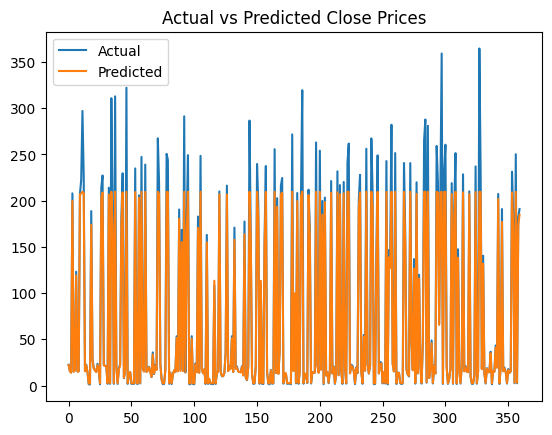

In [ ]:
from tensorflow.keras.layers import Activation

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('tanh')(cnn_conv1)  # tanh activation

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='tanh', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)  # tanh activation
dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)  # tanh activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()


#model 3 with selu

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 51.7996 - mae: 51.4837 - val_loss: 7.1793 - val_mae: 6.7777
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8807 - mae: 6.4834 - val_loss: 5.1001 - val_mae: 4.7146
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6629 - mae: 4.2866 - val_loss: 2.5072 - val_mae: 2.1447
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2131 - mae: 3.8565 - val_loss: 2.0204 - val_mae: 1.6777
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7517 - mae: 2.4166 - val_loss: 4.1839 - val_mae: 3.8644
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2684 - mae: 2.9519 - val_loss: 2.0673 - val_mae: 1.7594
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.8732 - mae: 2.5674 - val_loss: 4.0485 - val_mae: 3.7491
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.1364 - mae: 2.8413 - val_loss: 1.8911 - val_mae: 1.6043
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - lo

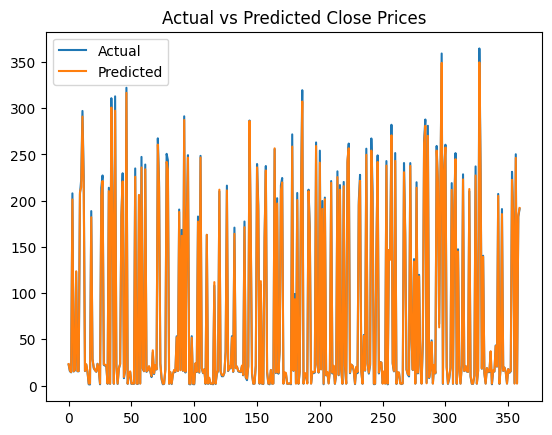

In [ ]:
from tensorflow.keras.layers import Activation

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('selu')(cnn_conv1)  # SELU activation

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='selu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation='selu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)  # SELU activation
dense2 = Dense(8, activation='selu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)  # SELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()


#model 3 with gelu


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 59.6323 - mae: 59.4147 - val_loss: 14.2343 - val_mae: 13.7560
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.5955 - mae: 8.1127 - val_loss: 5.9753 - val_mae: 5.5123
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4444 - mae: 3.9872 - val_loss: 2.8487 - val_mae: 2.4021
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0931 - mae: 2.6573 - val_loss: 3.0321 - val_mae: 2.6163
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7893 - mae: 3.3775 - val_loss: 3.7718 - val_mae: 3.3722
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7879 - mae: 4.3888 - val_loss: 3.4344 - val_mae: 3.0369
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2507 - mae: 2.8563 - val_loss: 3.6081 - val_mae: 3.2311
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4704 - mae: 3.0932 - val_loss: 1.9957 - val_mae: 1.6240
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

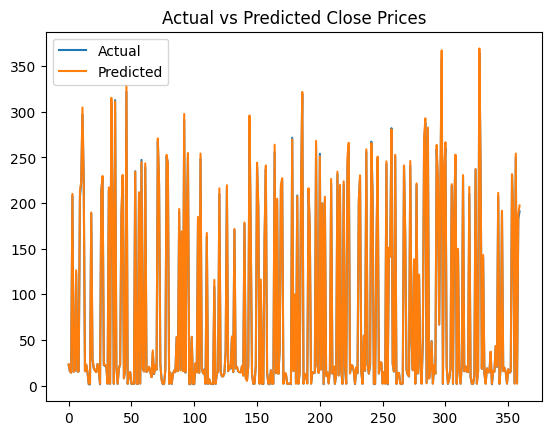

In [ ]:
from tensorflow.keras.layers import Activation

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation('gelu')(cnn_conv1)  # GELU activation

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='gelu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation='gelu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)  # GELU activation
dense2 = Dense(8, activation='gelu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)  # GELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()


#model 3 with custom

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 5, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 41.6758 - mae: 41.4089 - val_loss: 8.1236 - val_mae: 7.8193
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.6173 - mae: 5.3044 - val_loss: 6.4408 - val_mae: 6.1117
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.2121 - mae: 4.8856 - val_loss: 6.1210 - val_mae: 5.8073
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.3091 - mae: 3.9973 - val_loss: 5.8349 - val_mae: 5.5296
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0049 - mae: 3.7026 - val_loss: 3.4971 - val_mae: 3.2028
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1822 - mae: 2.8906 - val_loss: 3.0067 - val_mae: 2.7239
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5068 - mae: 2.2251 - val_loss: 2.1764 - val_mae: 1.9013
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3575 - mae: 2.0855 - val_loss: 1.7210 - val_mae: 1.4532
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

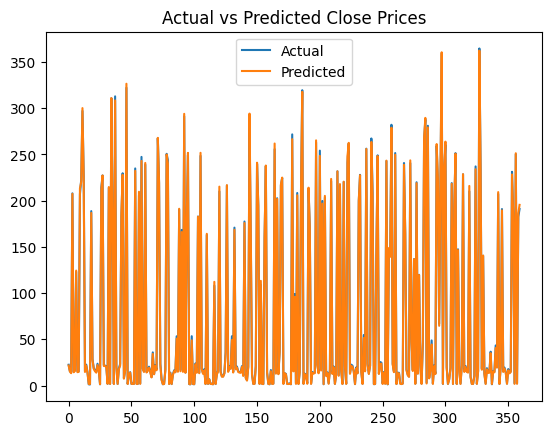

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, LSTM, Bidirectional, Dense
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define custom activation function
def custom_act(x):
    return tf.where(x >= 0, x, tf.tanh(x) + tf.atan(x))

# Load the new dataset
file_path = '/content/archive.zip'  # Update with your dataset path
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(data.head())

# Extracting relevant columns for features (excluding 'Date')
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
target_column = 'Close'  # We want to predict the 'Close' price

# Extract features (X) and target (y)
X = data[feature_columns].values
y = data[target_column].values

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Reshape data for LSTM (3D array: samples, timesteps, features)
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], X_train_norm.shape[1], 1)  # (samples, timesteps, features)
X_val_norm = X_val_norm.reshape(X_val_norm.shape[0], X_val_norm.shape[1], 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1], 1)

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))  # Shape matches the data
l2_strength = 0.001

# CNN block
nb_filters = 32
kernel_size = 3
cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)
cnn_activation1 = Activation(custom_act)(cnn_conv1)

# BiLSTM layer with regularization
bilstm_layer = Bidirectional(LSTM(32, activation='relu', return_sequences=False,
                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

# Dense layers
dense1 = Dense(16, activation=custom_act, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense2 = Dense(8, activation=custom_act, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
combined_model.summary()

# Compile the model with Adam optimizer and early stopping
opt = Adam(learning_rate=0.01)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=100, batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = combined_model.predict(X_test_norm)

# Regression metrics (e.g., MAE, MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.show()
